# 1. beam search

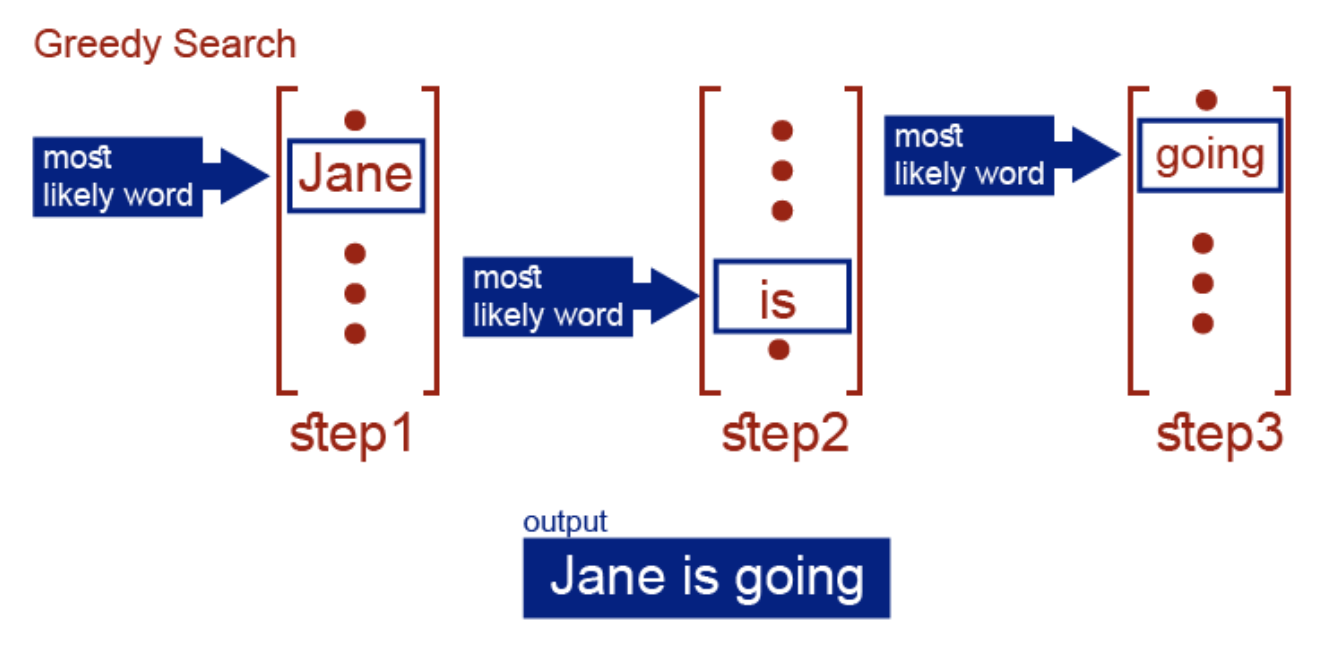

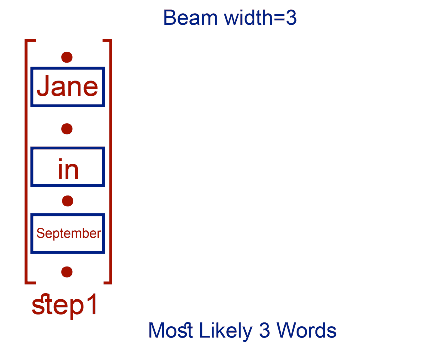

In [1]:
import numpy as np

In [2]:
# 一个包括10个词的序列，vocab为5
data = [[0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1]]
data = np.array(data)

In [3]:
data

array([[0.1, 0.2, 0.3, 0.4, 0.5],
       [0.5, 0.4, 0.3, 0.2, 0.1],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.5, 0.4, 0.3, 0.2, 0.1],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.5, 0.4, 0.3, 0.2, 0.1],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.5, 0.4, 0.3, 0.2, 0.1],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.5, 0.4, 0.3, 0.2, 0.1]])

In [4]:
# greedy decoder
def greedy_decoder(data):
    # index for largest probability each row
    return [np.argmax(s) for s in data]

In [5]:
result = greedy_decoder(data)
print(result)

[4, 0, 4, 0, 4, 0, 4, 0, 4, 0]


In [6]:
# beam search
def beam_search_decoder(data, k):
    sequences = [[list(), 1.0]]
#     print('sequences is ', sequences)
    # walk over each step in sequence
    for row in data:
#         print('row is', row)
        all_candidates = list()
        # expand each current candidate
        for i in range(len(sequences)):
#             print('sequences is', sequences)
#             print('sequences[i] is ', sequences[i])
            seq, score = sequences[i]
            for j in range(len(row)):
                candidate = [seq + [j], score * -np.log(row[j])]
#                 print('score is ',score)
#                 print('row[j] is ', row[j])
                print('candidate is ', candidate)
                all_candidates.append(candidate)
        # order all candidates by score
#             print('all_candidates is ', all_candidates)
        ordered = sorted(all_candidates, key=lambda tup:tup[1])
        # select k best
        sequences = ordered[:k]
    return sequences

In [7]:
result_1 = beam_search_decoder(data, 3)
# print result
for seq in result_1:
    print(seq)

candidate is  [[0], 2.3025850929940455]
candidate is  [[1], 1.6094379124341003]
candidate is  [[2], 1.2039728043259361]
candidate is  [[3], 0.916290731874155]
candidate is  [[4], 0.6931471805599453]
candidate is  [[4, 0], 0.4804530139182014]
candidate is  [[4, 1], 0.6351243373717793]
candidate is  [[4, 2], 0.8345303547893733]
candidate is  [[4, 3], 1.1155773512899807]
candidate is  [[4, 4], 1.596030365208182]
candidate is  [[3, 0], 0.6351243373717793]
candidate is  [[3, 1], 0.8395887053184746]
candidate is  [[3, 2], 1.1031891220323908]
candidate is  [[3, 3], 1.474713042690254]
candidate is  [[3, 4], 2.109837380062033]
candidate is  [[2, 0], 0.8345303547893733]
candidate is  [[2, 1], 1.1031891220323908]
candidate is  [[2, 2], 1.4495505135564588]
candidate is  [[2, 3], 1.937719476821764]
candidate is  [[2, 4], 2.7722498316111372]
candidate is  [[4, 0, 0], 1.1062839477321111]
candidate is  [[4, 0, 1], 0.7732592957431818]
candidate is  [[4, 0, 2], 0.5784523625139449]
candidate is  [[4, 0, 

In [9]:
import tensorflow as tf

In [16]:
a = tf.random.uniform([2, 2])

In [17]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.04315388, 0.68870234],
       [0.22065794, 0.19081199]], dtype=float32)>

# 2 Initializing neural networks

## 高效初始化的重要性
由于神经网络的对称性决定
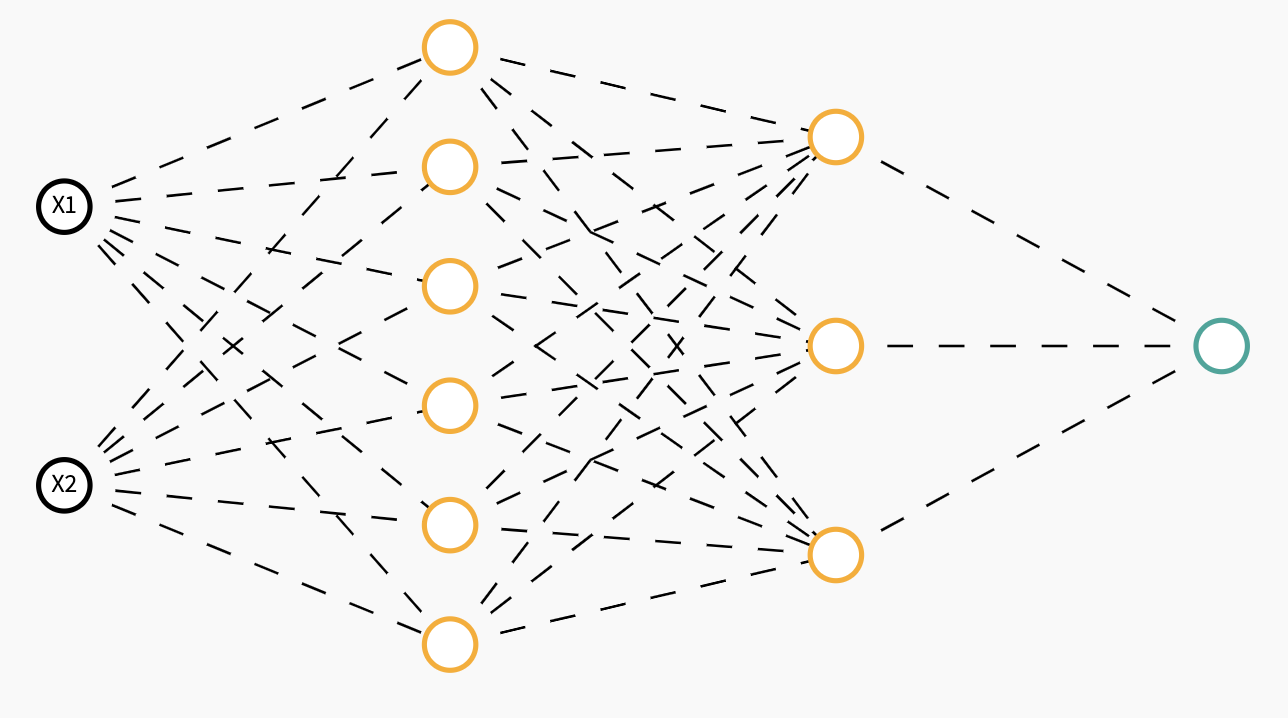

## 梯度消失和爆炸
太大和太小随着网络深度的增加会带来问题
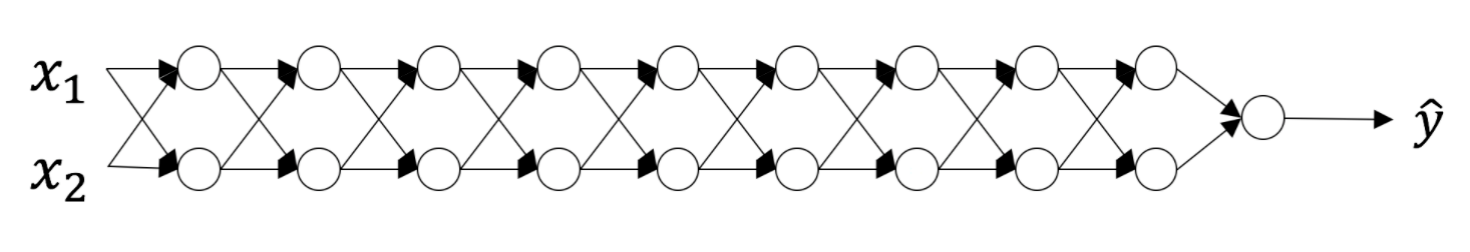

## 如何找到恰当的初始值
满足以下两种情况的参数初始值比较好：
1. 神经元输出值的均值为0
2. 每一层神经元输出值的方差


\begin{aligned}a^{[l-1]} &= g^{[l-1]}(z^{[l-1]})\\ z^{[l]} &= W^{[l]}a^{[l-1]} + b^{[l]}\\ a^{[l]} &= g^{[l]}(z^{[l]})\end{aligned} 


\begin{aligned}E[a^{[l-1]}] &= E[a^{[l]}]\\ Var(a^{[l-1]}) &= Var(a^{[l]})\end{aligned} 


该方法确保平均值为零，并保持每一层输入的方差值，避免梯度消失和爆炸现象，此方法同时适用于正向传播和反向传播。对于神经网络的每一层，建议使用xavier初始化（或其派生方法之一）

glorot_normal_initializer.

\begin{aligned}W^{[l]} &\sim \mathcal{N}(\mu=0,\sigma^2 = \frac{1}{n^{[l-1]}})\\ b^{[l]} &= 0\end{aligned} 

# 3 Parameter optimization in neural networks

## 3.1 loss function
根据不同问题定义不同的loss function
例如预测问题-平方损失
例如物体检测问题

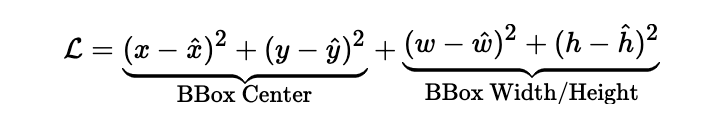

## 3.2 Cost function

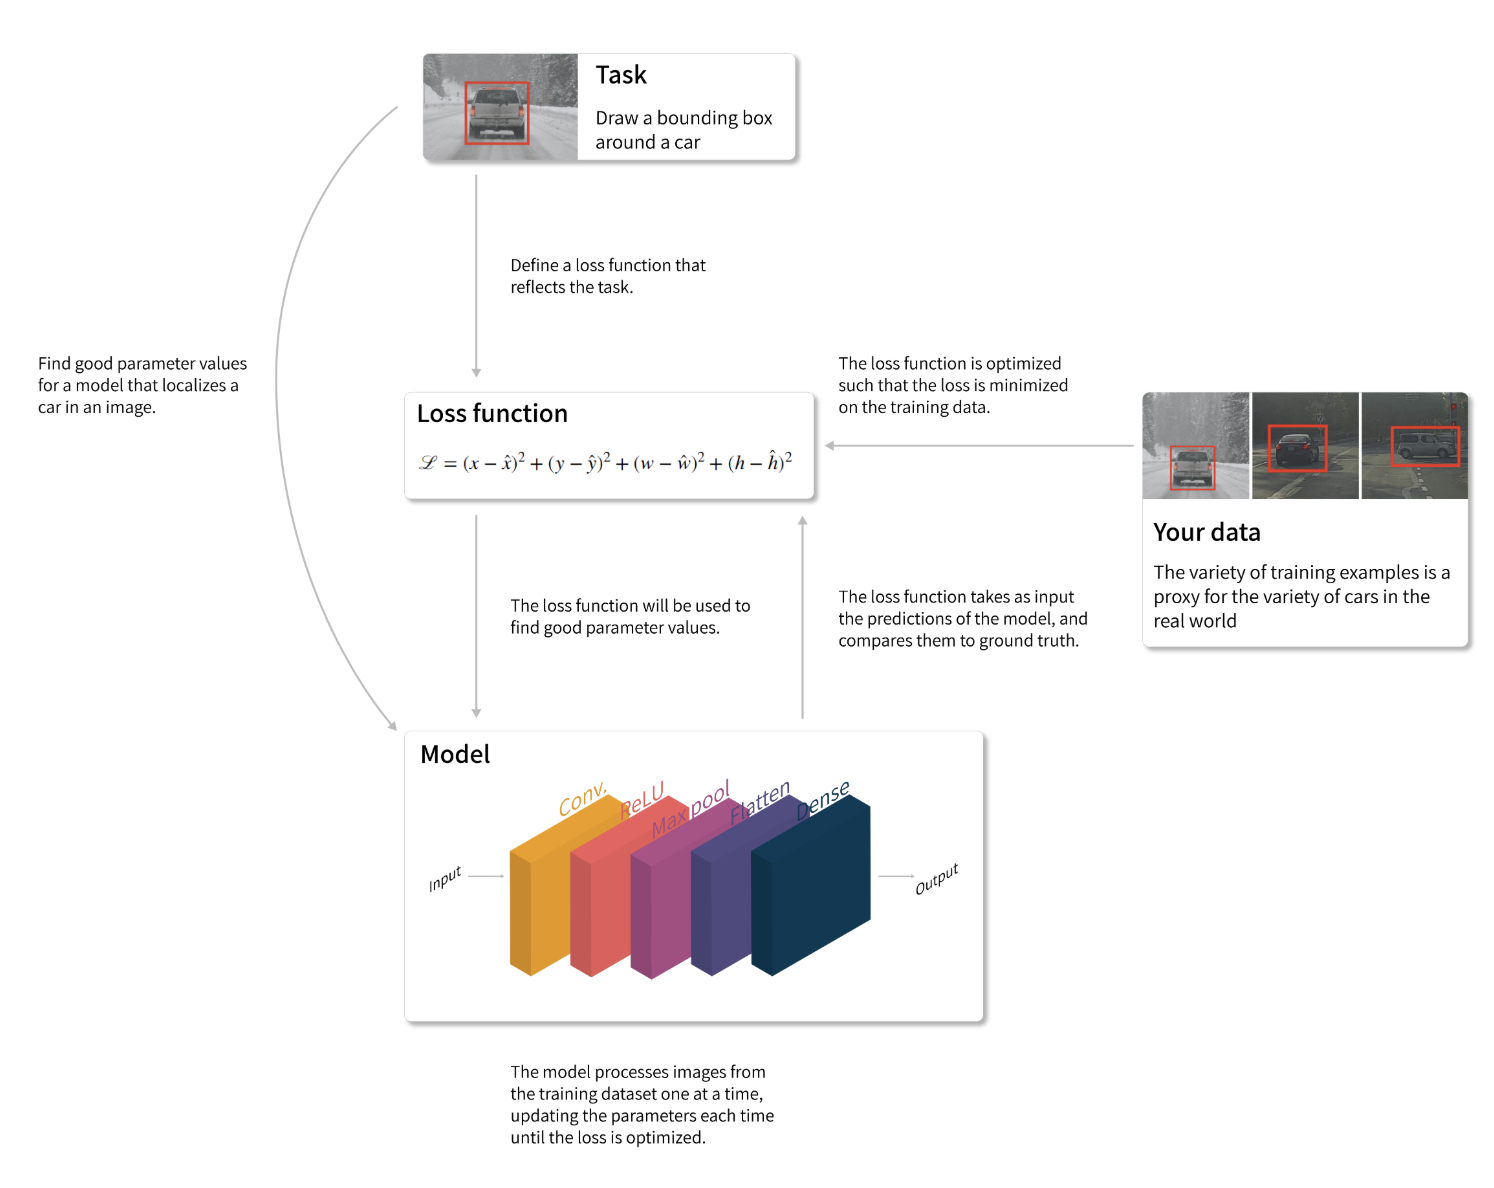

Tips：

1. 即使选择了最佳的超参数，训练后的模型也不会完全匹配真实的标签结果，因为数据集才是决定模型好坏的最根本。

2. 训练集的越大，训练的模型参数就越接近用于生成数据的参数。

3. 如果你的学习率太大，你的算法就不会收敛。如果它太小，你的算法收敛速度会很慢。


## 3.3 Batch size

1. Batch size是用于在每次迭代中训练模型的数据数量。一般的设置是32, 64, 128，256, 512。

2. 选择正确的Batch size对于确保cost function和参数值的收敛，以及模型的泛化能力。

3. Batch size决定更新的频率。Batch size越小，更新就越快。

4. Batch size越大，梯度越精确。也就是说，在迭代计算的时候更容易跳过局部区域。

5. 比较大Batch size，往往GPU memory是不够用的，就需要通过并行计算的方式解决。

## 3.4 Choice of optimizer


### 3.4.1 (Stochastic) Gradient Descent

W=W−αdW

1. 梯度下降可以有效地使用并行化，但是当GPU的存储器处理数据集较大时非常慢。并行化不是最优的。

2. 在大数据集上，随机梯度下降通常比梯度下降收敛更快，因为更新更频繁。另外，梯度的随机逼近通常是精确的，而不使用整个数据集，因为数据通常是冗余的。

3. 在优化器中，随机梯度下降对给定的batch size时使用内存是最小的。


### 3.4.2 Momentum

\begin{aligned} V_{dW} &= \beta V_{dW} + ( 1 - \beta ) dW\\ W &= W - \alpha V_{dW} \end{aligned} 

1. 动量通过对梯度的学习，实现一个加速的效果。

2. 动量比随机梯度下降使用更多的内存，但比rmsprop和adam要少。





### 3.4.3 RMSprop	

\begin{aligned} S_{dW} &= \beta S_{dW} + ( 1 - \beta ) dW^2\\ W &= W - \alpha \frac{dW}{\sqrt{S_{dW}} + \varepsilon} \end{aligned} 


1. rmsprop的自适应学习速率通常可以防止学习速率衰减过慢或过快。

2. 与随机梯度下降和动量相比，rmsprop在给定batch size下使用的内存更多，但比adam少。






### 3.4.4 Adam

\begin{aligned} V_{dW} &= \beta_1 V_{dW} + ( 1 - \beta_1 ) dW\\ S_{dW} &= \beta_2 S_{dW} + ( 1 - \beta_2 ) dW^2\\ Vcorr_{dW} &= \frac{V_{dW}}{(1 - \beta_1)^t}\\ Scorr_{dW} &= \frac{S_{dW}}{(1 - \beta_2)^t}\\ W &= W - \alpha \frac{dW}{\sqrt{S_{dW}} + \varepsilon} \end{aligned} 


1. Adam的超参数（学习速率，指数衰减率等）通常被设置为预定义值，并且不需要调。
2. Adam采用自适应步长进行学习率的变化。
3. 在优化器中，Adam在给定的batch size中使用的内存最多。
4. Adam一般在机器学习当中都是默认首选的优化器。






# 4. seq2seq案例

In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time
import pandas as pd

assert tf.__version__.startswith('2.')

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [21]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def preprocess_sentence_english(w):
    w = unicode_to_ascii(w.lower().strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.rstrip().strip()

    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '<start> ' + w + ' <end>'
    return w
  
def preprocess_sentence_hindi(w):
    w = unicode_to_ascii(w.strip())

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    # w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.rstrip().strip()

    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '<start> ' + w + ' <end>'
    return w

In [22]:
PATH = "/Users/zn-nlp/Documents/Hindi_English_Truncated_Corpus.csv"
data = pd.read_csv(PATH)
data.head(3)

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।


In [24]:
print(data['english_sentence'].count())
print(data['hindi_sentence'].count())

127605
127607


In [25]:
data = data[data['english_sentence'].map(type) == str]
data = data[data['hindi_sentence'].map(type) == str]
data = data[data['english_sentence'].map(len) > 0]
data = data[data['hindi_sentence'].map(len) > 0]

print(data['english_sentence'].count())
print(data['hindi_sentence'].count())

127605
127605


In [26]:
data["token_size_en"] = data["english_sentence"].apply(lambda x: len(x.split(' ')))
data["token_size_hn"] = data["hindi_sentence"].apply(lambda x: len(x.split(' ')))
data = data.loc[data['token_size_hn'] < 22].copy()

In [27]:
int(data['english_sentence'].count())
print(data['hindi_sentence'].count())

90799


In [28]:
data['english_sentence'] = data['english_sentence'].apply(preprocess_sentence_english)
data['hindi_sentence'] = data['hindi_sentence'].apply(preprocess_sentence_hindi)

In [29]:
data.head()

,source,english_sentence,hindi_sentence,token_size_en,token_size_hn
0,ted,<start> politicians do not have permission to ...,"<start> राजनीतिजञो क पास जो कारय करना चाहिए , ...",12,14
1,ted,<start> i d like to tell you about one such ch...,<start> मई आपको ऐस ही एक बचच क बार म बताना चाह...,9,11
2,indic2012,<start> this percentage is even greater than t...,<start> यह परतिशत भारत म हिनदओ परतिशत स अधिक ह...,10,9
3,ted,<start> what we really mean is that they re ba...,<start> हम य नही कहना चाहत कि वो धयान नही द पा...,12,11
4,indic2012,<start> . the ending portion of these vedas is...,<start> इनही वदो का अतिम भाग उपनिषद कहलाता ह। ...,9,8


In [30]:
en = data['english_sentence'].values.tolist()
hn = data['hindi_sentence'].values.tolist()

In [31]:
len(en),len(hn)

(90799, 90799)

In [32]:
en[-1],hn[-1]

('<start> they ve just won four government contracts to build off their ambulances , <end>',
 '<start> हाल ही म उनह सरकारी ठका मिला ह करीब सौ नई अमबलनस बनान का , <end>')

In [34]:
def max_length(tensor): return max(len(t) for t in tensor)

In [35]:
def tokenize(lang):
    lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    lang_tokenizer.fit_on_texts(lang)

    tensor = lang_tokenizer.texts_to_sequences(lang)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, lang_tokenizer

In [36]:
def load_dataset(num_examples):
    # creating cleaned input, output pairs
    targ_lang = data['hindi_sentence'].values.tolist()[:num_examples]
    inp_lang = data['english_sentence'].values.tolist()[:num_examples]
    
    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
    target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [37]:
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(350)

# Calculate max_length of the target tensors
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

In [38]:
print(max_length_inp,max_length_targ)
print(len(input_tensor),target_tensor[:2])

35 24
350 [[  1 423   4  89  30 215  53  76   7  41  33  18 424  17   3   5   2   0
    0   0   0   0   0   0]
 [  1 425 216 217  31  14 218   4  34   6 426 427   7   2   0   0   0   0
    0   0   0   0   0   0]]


In [39]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

280 280 70 70


In [40]:
def convert(lang, tensor):
    for t in tensor:
        if t != 0:
            print("%d ----> %s" % (t, lang.index_word[t]))

In [41]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

Input Language; index to word mapping
1 ----> <start>
112 ----> three
13 ----> this
9 ----> is
11 ----> a
227 ----> good
429 ----> road
10 ----> in
228 ----> right
151 ----> near
73 ----> where
92 ----> our
430 ----> factory
9 ----> is
431 ----> located
3 ----> .
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
507 ----> तीसरी:
26 ----> य
156 ----> हमारी
508 ----> फकटरी
4 ----> क
89 ----> पास
10 ----> की
14 ----> एक
242 ----> अपकषाकत
243 ----> बहतर
244 ----> सडक
13 ----> ह।
2 ----> <end>


In [42]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train) // BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index) + 1
vocab_tar_size = len(targ_lang.word_index) + 1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [43]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 35]), TensorShape([64, 24]))

In [44]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [45]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 35, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [46]:
class BahdanauAttention(tf.keras.Model):
    # other attention is LuongAttention
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(query, 1)

        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = self.V(tf.nn.tanh(self.W1(values) + self.W2(hidden_with_time_axis)))

        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [47]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 35, 1)


In [48]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)

        # used for attention
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))

        # output shape == (batch_size, vocab)
        x = self.fc(output)

        return x, state, attention_weights

In [49]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((64, 1)), sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 1596)


In [50]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [51]:
checkpoint_dir = '/Users/zn-nlp/Documents/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [52]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        dec_hidden = enc_hidden

        dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

        # Teacher forcing - feeding the target as the next input
        for t in range(1, targ.shape[1]):
            # passing enc_output to the decoder
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

            loss += loss_function(targ[:,t], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(targ[:,t], 1)

    batch_loss = (loss / int(targ.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [53]:
EPOCHS = 3

for epoch in range(EPOCHS):
    start = time.time()

    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1, batch, batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 3.7114
Epoch 1 Loss 3.7085
Time taken for 1 epoch 37.49297618865967 sec

Epoch 2 Batch 0 Loss 5.6323
Epoch 2 Loss 4.0102
Time taken for 1 epoch 13.249579906463623 sec

Epoch 3 Batch 0 Loss 3.8664
Epoch 3 Loss 3.5007
Time taken for 1 epoch 13.035505771636963 sec



In [ ]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence_english(sentence)

    inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.index_word[predicted_id] + ' '

        if targ_lang.index_word[predicted_id] == '<end>':
            return result, sentence, attention_plot

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [ ]:
def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
translate(u'politicians do not have permission to')